In [106]:
# Librerias utilizadas en el proyecto

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay

In [107]:
BD = pd.read_csv('./uci.csv') # Se carga la base segun como la haya guardado 
BD.head(5)

,Edad,Sexo,Tipo de dolor en el pecho,Presion arterial en reposo,Colesterol total,Azucar en sangre,Resultado electrocardiograma,Ritmo cardiaco maximo,Angina por ejercicio,Depresion,Pendiente test de depresion,Numero de vasos principales,Talasemia,Diagnostico enfermedad cardiaca
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [108]:
# Observamos los estadisticos descriptivos de la base de datos
BD.describe()

,Edad,Sexo,Tipo de dolor en el pecho,Presion arterial en reposo,Colesterol total,Azucar en sangre,Resultado electrocardiograma,Ritmo cardiaco maximo,Angina por ejercicio,Depresion,Pendiente test de depresion,Numero de vasos principales,Talasemia,Diagnostico enfermedad cardiaca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Cantidad de Registros con cero en Resultado electrocardiograma:  147
Cantidad de Registros con cero en Depresion:  96
Cantidad de Registros con cero en Pendiente test de depresion:  139
Cantidad de Registros con cero en Numero de vasos principales:  174
Cantidad de Registros con cero en Talasemia:  164


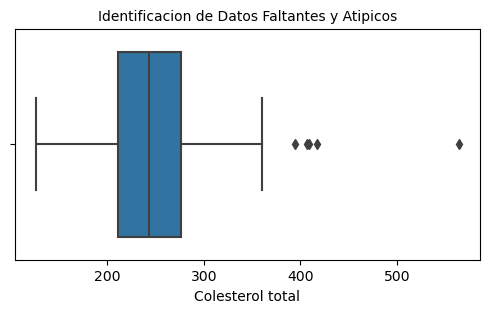

In [109]:
# Creamos una figura
plt.figure(figsize=(6, 3))

# Creamos un grafico de caja para ver la distribucion del colesterol
sns.boxplot(x=BD['Colesterol total'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10 )

# Observamos la cantidad de registros con cero resultados
print("Cantidad de Registros con cero en Resultado electrocardiograma: ",BD['Resultado electrocardiograma'].isin([0]).sum())
print("Cantidad de Registros con cero en Depresion: ",BD['Depresion'].isin([0]).sum())
print("Cantidad de Registros con cero en Pendiente test de depresion: ",BD['Pendiente test de depresion'].isin([0]).sum())
print("Cantidad de Registros con cero en Numero de vasos principales: ",BD['Numero de vasos principales '].isin([0]).sum())
print("Cantidad de Registros con cero en Talasemia: ",BD['Talasemia'].isin([0]).sum())

In [110]:
# Reemplazamos los valores en 0 por la media de cada columna
BD['Resultado electrocardiograma']= BD['Resultado electrocardiograma'].replace(0,BD['Resultado electrocardiograma'].mean())
BD['Depresion']=BD['Depresion'].replace(0,BD['Depresion'].mean())
BD['Pendiente test de depresion']=BD['Pendiente test de depresion'].replace(0,BD['Pendiente test de depresion'].mean())
BD['Numero de vasos principales ']=BD['Numero de vasos principales '].replace(0,BD['Numero de vasos principales '].mean())
BD['Talasemia']=BD['Talasemia'].replace(0,BD['Talasemia'].mean())

# Observamos que ya no hay ningun valor en 0 en las columnas de la base de datos
print("Cantidad de Registros con cero en Resultado electrocardiograma: ",BD['Resultado electrocardiograma'].isin([0]).sum())
print("Cantidad de Registros con cero en Depresion: ",BD['Depresion'].isin([0]).sum())
print("Cantidad de Registros con cero en Pendiente test de depresion: ",BD['Pendiente test de depresion'].isin([0]).sum())
print("Cantidad de Registros con cero en Numero de vasos principales: ",BD['Numero de vasos principales '].isin([0]).sum())
print("Cantidad de Registros con cero en Talasemia: ",BD['Talasemia'].isin([0]).sum())

Cantidad de Registros con cero en Resultado electrocardiograma:  0
Cantidad de Registros con cero en Depresion:  0
Cantidad de Registros con cero en Pendiente test de depresion:  0
Cantidad de Registros con cero en Numero de vasos principales:  0
Cantidad de Registros con cero en Talasemia:  0


Text(0.5, 1.0, 'Identificacion de Datos Atipicos')

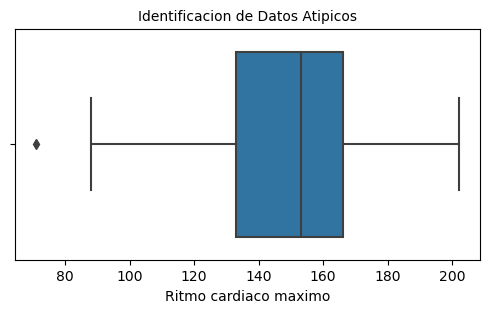

In [111]:
# Creamos un grafico para observar la distribucion de la variable Ritmo cardiaco maximo
plt.figure(figsize=(6, 3))
sns.boxplot(x=BD['Ritmo cardiaco maximo'])
plt.title('Identificacion de Datos Atipicos', fontsize=10 )

In [112]:
# Observamos la cantidad de datos atipicos en la variable Ritmo cardiaco maximo
nivel_minimo=100
nivel_maximo=200
Total_Atipicos=((BD['Ritmo cardiaco maximo']<nivel_minimo)|(BD['Ritmo cardiaco maximo']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(Total_Atipicos))

El total de datos atipicos es 9


In [113]:
# Eliminamos los datos atipicos
BD=BD[(BD['Ritmo cardiaco maximo']<nivel_maximo)&(BD['Ritmo cardiaco maximo']>nivel_minimo)]

In [114]:
# Observamos la cantidad de datos atipicos en la variable Ritmo cardiaco maximo
Total_Atipicos=((BD['Ritmo cardiaco maximo']<nivel_minimo)|(BD['Ritmo cardiaco maximo']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(Total_Atipicos))

El total de datos atipicos es 0


In [115]:
# Observamos la informacion de la base de datos
BD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 0 to 296
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Edad                              288 non-null    int64  
 1   Sexo                              288 non-null    int64  
 2   Tipo de dolor en el pecho         288 non-null    int64  
 3   Presion arterial en reposo        288 non-null    int64  
 4   Colesterol total                  288 non-null    int64  
 5   Azucar en sangre                  288 non-null    int64  
 6   Resultado electrocardiograma      288 non-null    float64
 7   Ritmo cardiaco maximo             288 non-null    int64  
 8   Angina por ejercicio              288 non-null    int64  
 9   Depresion                         288 non-null    float64
 10  Pendiente test de depresion       288 non-null    float64
 11  Numero de vasos principales       288 non-null    float64
 12  Talasemia    

In [116]:
# Realizamos un conteo de cada valor de la variable Diagnostico enfermedad cardiaca
BD['Diagnostico  enfermedad cardiaca'].value_counts()

Diagnostico  enfermedad cardiaca
0    158
1    130
Name: count, dtype: int64

In [117]:
# Definimos cual es la variable dependiente y el conjunto de caracteristicas
X = BD.drop('Diagnostico  enfermedad cardiaca',axis=1) 
Y = BD['Diagnostico  enfermedad cardiaca'] 

# Dividimos la base de datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

# Imprimimos el conjunto de caracteristicas de entrenamiento
print (X_train)

     Edad  Sexo  Tipo de dolor en el pecho  Presion arterial en reposo  \
131    48     1                          2                         124   
142    43     0                          2                         122   
244    54     1                          3                         124   
26     66     1                          1                         160   
54     46     1                          1                         101   
..    ...   ...                        ...                         ...   
172    65     1                          3                         120   
267    48     1                          3                         124   
180    63     0                          3                         150   
277    45     1                          3                         142   
233    57     1                          3                         132   

     Colesterol total  Azucar en sangre  Resultado electrocardiograma  \
131               255                 

In [118]:
# Imprimimos los datos de la variable dependiente de entrenamiento
print(Y_train)

131    0
142    0
244    1
26     1
54     0
      ..
172    0
267    1
180    1
277    1
233    0
Name: Diagnostico  enfermedad cardiaca, Length: 216, dtype: int64


In [119]:
# Creamos el modeo de regresion Logistica
modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit (X_train , Y_train)

# Realizamos la prediccion
Prediccion = modelo_regresion.predict(X_test)

# Imprimimos los valores de la variable dependiente de prueba
print (Y_test)

276    0
119    0
253    0
220    1
285    0
      ..
74     1
139    0
110    0
224    1
105    0
Name: Diagnostico  enfermedad cardiaca, Length: 72, dtype: int64


In [120]:
# Mostramos la prediccion realizada por el modelo
print (Prediccion)

[0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0]


In [121]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        39
           1       0.90      0.79      0.84        33

    accuracy                           0.86        72
   macro avg       0.87      0.86      0.86        72
weighted avg       0.86      0.86      0.86        72



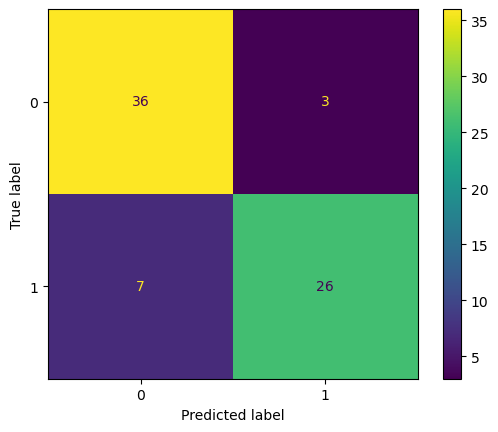

In [122]:
# Creamos la matriz de confusion
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

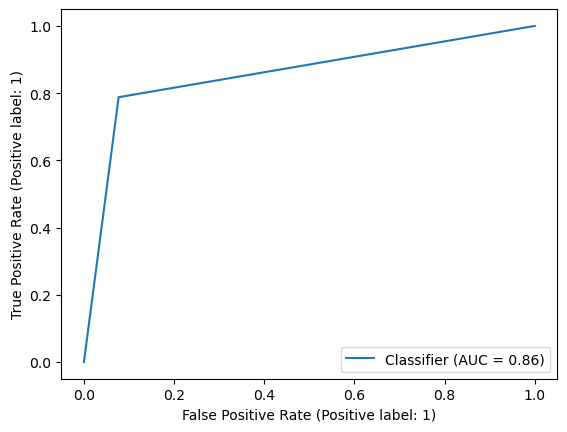

In [123]:
# Creamos la curva ROC
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()   